<a href="https://colab.research.google.com/github/alexoh2bd/ds_playground/blob/main/Bigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words = open('names.txt','r').read().splitlines()
words[:15]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella']

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs,chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) +1
    b
b[:10]

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [ ]:
# Map characters to indices
sorted(b.items(), key = lambda x:-x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

N = torch.zeros((28, 28) , dtype = torch.int32)
chars= sorted(list(set(''.join(words))))
stoi = {n: i+1 for i, n in enumerate(chars)}
stoi['.'] = 0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) +1
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] +=1
itos={i:s for s, i in stoi.items()}

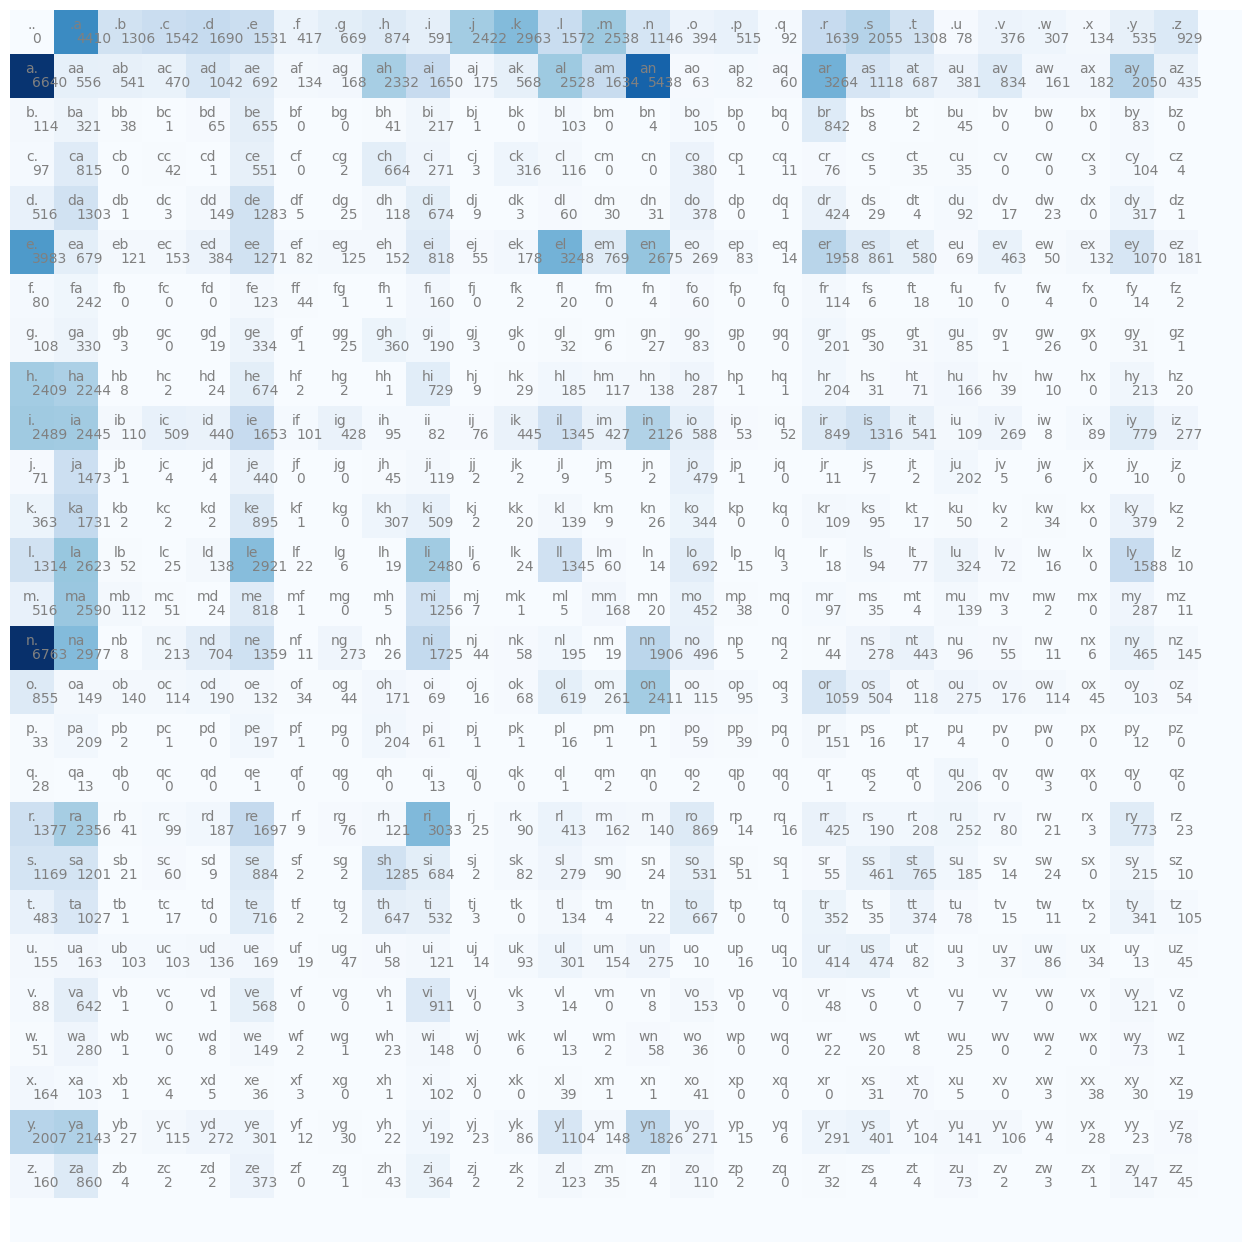

In [ ]:

plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
    plt.text(j, i, N[i,j].item(), va = 'top', color = 'gray')
plt.axis('off');

In [ ]:
P = N.float()
P/=P.sum(1, keepdim = True)
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  ix=0
  while True:
    p= W.data[ix]
    ix = torch.multinomial(W.data, num_samples = 1, replacement=True, generator = g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))


RuntimeError: probability tensor contains either `inf`, `nan` or element < 0

Goal : Maximize likelihood of data with respect to model parameters
Equivalent to Maximizing log likelihood (monotonic)
Equivalent to minimizing neg log likelihood
Equivalent to minimizing avg nll

In [ ]:
log_likelihood = 0
n=0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood+=logprob
    n+=1
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

# neg log likelihood
nll=-log_likelihood
print(f'{nll/n=}')


nll/n=tensor(2.4541)


Create the training set of Bigrams

In [ ]:
xs, ys = [],[]

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
    # print(ix1, ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys)


tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [ ]:
import torch.nn.functional as F
g = torch.Generator().manual_seed(2147483647)


# Random Weights
W=torch.randn((27,27), generator=g, requires_grad=True)


In [ ]:
# gradient descent
for k in range(100):
  xenc = F.one_hot(xs, num_classes=27).float()

  # Forward Pass
  # Can interprate the exponentiated log-counts
  logits = (xenc @ W)
  counts = logits.exp() # Equivalent N array counts
  probs = counts / counts.sum(1, keepdims=True) # Normalize Counts to get a prob distribution for each row (character likelihood)b
  loss = -probs[torch.arange(5), ys].log().mean() + 0.01*(W**2).mean()# mean of nll prob of each nest integer, Regularization loss/ Smoothing to make look more uniform / pushes W to be 0
  print(loss.item())

  # Backward Pass
  W.grad = None # set to 0
  loss.backward()

  # update
  # print(f'{W.data=} {W.grad=}')
  W.data += -1 * W.grad

3.778970241546631
3.578986406326294
3.383542060852051
3.193100690841675
3.0081145763397217
2.8290159702301025
2.656205654144287
2.4900529384613037
2.3308956623077393
2.1790452003479004
2.0347859859466553
1.8983745574951172
1.7700313329696655
1.6499252319335938
1.5381582975387573
1.4347461462020874
1.3396061658859253
1.2525501251220703
1.173287034034729
1.1014331579208374
1.036531686782837
0.9780738353729248
0.9255234003067017
0.8783372044563293
0.8359838128089905
0.7979572415351868
0.7637858986854553
0.7330372929573059
0.7053213715553284
0.6802887320518494
0.6576290726661682
0.6370694041252136
0.6183692812919617
0.6013181209564209
0.5857316255569458
0.5714488625526428
0.5583285093307495
0.5462474226951599
0.5350973606109619
0.5247834920883179
0.5152223110198975
0.5063402652740479
0.49807244539260864
0.49036139249801636
0.4831564128398895
0.4764120876789093
0.4700881540775299
0.464148610830307
0.45856142044067383
0.4532976746559143
0.44833141565322876
0.4436393082141876
0.43920031189918

In [ ]:
out=[]
for i in range(10):
  out = []
  ix=0
  while True:
    p= W[ix]
    ix = torch.multinomial(, num_samples = 1, replacement=True, generator = g).item()
    out.append(itos[ix])
    if ix==0:
      break

RuntimeError: probability tensor contains either `inf`, `nan` or element < 0